# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [5]:
import numpy as np

import pandas as pd


In [3]:
!pip install --target=/workspace ucimlrepo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 60.2 MB/s eta 0:00:0000:0100:01
  Using cached certifi-2024.7.4-py3-none-any.whl (162 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 65.4 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.11.2 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.0 which is incompatible.


In [2]:
pip install --upgrade matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 20.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install --upgrade pandas seaborn matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 49.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 36.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

I will analyze movie production and crew dynamics using tmdb_5000_credits.csv and tmdb_5000_movies.csv.

The first dataset includes crew roles, while the second provides movie details.

Combining these will help explore how crew roles affect movie success and identify trends in production metrics.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

# DATASET 1 (tmdb_5000_movies.csv)

Reason for Selection: This dataset provides comprehensive movie details, including titles, genres, and release dates, making it valuable for analyzing movie trends and performances over time.

Gathering Method: The dataset was programmatically downloaded from Kaggle using a Python script that utilizes Kaggle's API.
    
This approach automates the download process, ensuring you can easily update or retrieve the dataset without manual intervention.

# DATASET 2 (tmdb_5000_credits.csv)

Reason for Selection: This dataset was chosen because it contains detailed crew information for movies, which is crucial for analyzing the roles and contributions of different crew members in the film industry.

Gathering Method: The dataset was downloaded manually from Kaggle, a popular data repository. This method ensures you have the latest version of the dataset and can access supplementary resources provided by the competition or dataset description.

# TMDb Movie Dataset: This dataset contains

# detailed information on movies, including their

# budget, revenue, genres, and cast


The TMDb Movie Dataset contains comprehensive details about various movies.

This includes essential attributes such as budget, revenue, genres, and the main cast,

providing a rich source of information for analyzing movie performance.



# IMDb Ratings Dataset: This dataset includes

# IMDb ratings, votes, and reviews for various

# movies.


The IMDb Ratings Dataset offers valuable insights into audience opinions by providing IMDb ratings, the number of votes,

and user reviews for a wide range of movies.

This dataset is essential for understanding viewer preferences and the factors contributing to a movie's popularity and critical reception.

# Load credits dataset

# Display basic information

In [24]:
import pandas as pd
credits_file_path = 'tmdb_5000_movies.csv'
credits_data = pd.read_csv(credits_file_path)

print("Credits Data:")
print(credits_data.info(0))
print(credits_data.head(1))


Credits Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status 

#### **Dataset 1**

Type: CSV File
Method: Download data manually (from Kaggle)
Dataset variables:
    

    Variable 1: budget (Budget of the movie)
    Variable 2: revenue (Revenue generated by the movie)

# CHECK

# Path to the ZIP file

# Name of the CSV file inside the ZIP archive

# Open the ZIP file

# Check if the CSV file exists in the ZIP archive

# Open and read the CSV file inside the ZIP 
# archive

# Display first few rows

# Display dataset summary statistics

# Check for null values in each column

In [16]:
import pandas as pd
import zipfile

zip_file = 'archive.zip'

file_to_read = 'tmdb_5000_movies.csv'

try:
    with zipfile.ZipFile(zip_file) as z:
        if file_to_read in z.namelist():
            with z.open(file_to_read) as f:
                reader_tmdb = pd.read_csv(f)
                print("Successfully loaded the CSV file from ZIP.")
        else:
            print(f"File '{file_to_read}' not found in the ZIP.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

print(reader_tmdb.head())

print(reader_tmdb.describe())

print(reader_tmdb.isna().sum())


Successfully loaded the CSV file from ZIP.
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na..

# Assuming 'reader' contains your DataFrame

# from tmdb_5000_movies.csv

# Print the first two rows of the dataset

In [17]:
print(reader.head(2))

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies 

# print concise summery of the dataset

# Load the dataset

# Display a concise summary of the dataset

In [23]:
import pandas as pd

movies_file_path = 'tmdb_5000_movies.csv'
movies_data = pd.read_csv(movies_file_path)

print("Movies Data Summary:")
print(movies_data.describe(include='all'))


Movies Data Summary:
              budget                         genres  \
count   4.803000e+03                           4803   
unique           NaN                           1175   
top              NaN  [{"id": 18, "name": "Drama"}]   
freq             NaN                            370   
mean    2.904504e+07                            NaN   
std     4.072239e+07                            NaN   
min     0.000000e+00                            NaN   
25%     7.900000e+05                            NaN   
50%     1.500000e+07                            NaN   
75%     4.000000e+07                            NaN   
max     3.800000e+08                            NaN   

                                 homepage             id keywords  \
count                                1712    4803.000000     4803   
unique                               1691            NaN     4222   
top     http://www.missionimpossible.com/            NaN       []   
freq                                    4 

# Assuming 'reader' contains your DataFrame

# from tmdb_5000_movies.csv

# Print the last two rows of the dataset

In [19]:
print(reader.tail(2))

      budget                               genres  \
4801       0                                   []   
4802       0  [{"id": 99, "name": "Documentary"}]   

                         homepage      id  \
4801  http://shanghaicalling.com/  126186   
4802                          NaN   25975   

                                               keywords original_language  \
4801                                                 []                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

         original_title                                           overview  \
4801   Shanghai Calling  When ambitious New York attorney Sam is sent t...   
4802  My Date with Drew  Ever since the second grade when he first saw ...   

      popularity                               production_companies  \
4801    0.857008                                                 []   
4802    1.929883  [{"name": "rusty bear entertainment", "id": 87...   

                       

# since the dataset contain null values also 

# count total rows in each column which contain null values

In [21]:
reader.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

# Dataset 2

Type: CSV File

Method: The data was gathered using web scraping from IMDb.

Dataset variables:

# Variable 1: crew_id

This variable is useful for tracking and distinguishing between different crew members across various projects.
Type: Numeric or string (depends on the dataset's format).
    
The crew_id uniquely identifies each crew member, allowing for precise tracking and management of individual contributions across multiple films.
    
Analyzing crew_id helps in linking crew members to specific roles and projects,

which is crucial for understanding their impact and involvement in the film industry.


# Variable 2: job

Significance: Describes the role or position of the crew member in the movie, such as "Director," "Producer," "Writer," etc.

This variable is important for understanding the distribution of different roles within the film industry and analyzing how various roles contribute to movie production.

The job variable provides insights into the various roles and responsibilities within a film crew, enabling an analysis of how different positions contribute to film production.

Examining the distribution of job roles helps in understanding industry trends and the prevalence of specific job titles, which can inform staffing decisions and industry research.

# Load the dataset

# Display a concise summary of the dataset

In [22]:
import pandas as pd

# Load the dataset
credits_file_path = 'tmdb_5000_credits.csv'
credits_data = pd.read_csv(credits_file_path)

# Display a concise summary of the dataset
print("Credits Data Summary:")
print(credits_data.describe(include='all'))


Credits Data Summary:
             movie_id     title  cast  crew
count     4803.000000      4803  4803  4803
unique            NaN      4800  4761  4776
top               NaN  The Host    []    []
freq              NaN         2    43    28
mean     57165.484281       NaN   NaN   NaN
std      88694.614033       NaN   NaN   NaN
min          5.000000       NaN   NaN   NaN
25%       9014.500000       NaN   NaN   NaN
50%      14629.000000       NaN   NaN   NaN
75%      58610.500000       NaN   NaN   NaN
max     459488.000000       NaN   NaN   NaN


# Path to the ZIP file

# Name of the CSV file inside the ZIP archive

# Open the ZIP file

# Check if the CSV file exists in the ZIP archive

# Open and read the CSV file inside the ZIP

# archive

# Display first few rows

# Display dataset summary statistics

# Check for null values in each column

In [25]:
import pandas as pd
import zipfile

zip_file = 'archive.zip'

file_to_read = 'tmdb_5000_credits.csv'

try:
    with zipfile.ZipFile(zip_file) as z:
        if file_to_read in z.namelist():
            with z.open(file_to_read) as f:
                reader_tmdb = pd.read_csv(f)
                print("Successfully loaded the CSV file from ZIP.")
        else:
            print(f"File '{file_to_read}' not found in the ZIP.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

print(reader_tmdb.head())

print(reader_tmdb.describe())

print(reader_tmdb.isna().sum())


Successfully loaded the CSV file from ZIP.
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4 

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

# Load the data

# Display the first few rows of the 'cast' and 'crew' columns

In [20]:
import pandas as pd

# Load the data
credits_data = pd.read_csv('tmdb_5000_credits.csv')

# Display the first few rows of the 'cast' and 'crew' columns
print("First few rows of 'cast' column:")
print(credits_data['cast'].head())

print("\nFirst few rows of 'crew' column:")
print(credits_data['crew'].head())


First few rows of 'cast' column:
0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object

First few rows of 'crew' column:
0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object


# Load datasets

# Display basic information

In [26]:
import pandas as pd

# Load datasets
credits_file_path = 'tmdb_5000_credits.csv'
movies_file_path = 'tmdb_5000_movies.csv'

credits_data = pd.read_csv(credits_file_path)
movies_data = pd.read_csv(movies_file_path)

# Display basic information
print("Credits Data Info:")
print(credits_data.info())
print(credits_data.head())

print("\nMovies Data Info:")
print(movies_data.info())
print(movies_data.head())


Credits Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
None
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "cha

# FILL IN - Inspecting the dataframe visually

# Example code for visual inspection

# Display the first few rows to visually inspect

# the data

In [25]:
print(reader.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

# FILL IN - Inspecting the dataframe 

# programmatically

# Example code for programmatic inspection

# Check data types, non-null counts, and other 

# metadata

In [26]:
reader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Issue and justification:

The ValueError occurred due to overlapping column names between the original credits_data and the crew_normalized DataFrame.

To resolve this, you need to use suffixes to distinguish between the columns with the same names before performing the join operation.

# Load data

# Parse 'cast' and 'crew' columns

# Normalize 'cast' data

# Normalize 'crew' data

In [28]:
import pandas as pd
import json

credits_data = pd.read_csv('tmdb_5000_credits.csv')

credits_data['cast'] = credits_data['cast'].apply(lambda x: json.loads(x))
credits_data['crew'] = credits_data['crew'].apply(lambda x: json.loads(x))

cast_normalized = pd.json_normalize(credits_data['cast'].explode())
credits_data = credits_data.drop(columns='cast').join(cast_normalized, rsuffix='_cast')

crew_normalized = pd.json_normalize(credits_data['crew'].explode())
credits_data = credits_data.drop(columns='crew').join(crew_normalized, rsuffix='_crew')

print(credits_data.head())


   movie_id                                     title  cast_id  \
0     19995                                    Avatar    242.0   
1       285  Pirates of the Caribbean: At World's End      3.0   
2    206647                                   Spectre     25.0   
3     49026                     The Dark Knight Rises      4.0   
4     49529                               John Carter      5.0   

             character                 credit_id  gender       id  \
0           Jake Sully  5602a8a7c3a3685532001c9a     2.0  65731.0   
1              Neytiri  52fe48009251416c750ac9cb     1.0   8691.0   
2  Dr. Grace Augustine  52fe48009251416c750aca39     1.0  10205.0   
3        Col. Quaritch  52fe48009251416c750ac9cf     2.0  32747.0   
4         Trudy Chacon  52fe48009251416c750ac9d3     1.0  17647.0   

                 name  order            credit_id_crew  department  \
0     Sam Worthington    0.0  52fe48009251416c750aca23     Editing   
1         Zoe Saldana    1.0  539c47ecc3a36810e3

# Load data

# Parse 'cast' and 'crew' columns

# Normalize 'cast' data

# Drop the 'cast' column and join normalized cast data

# Normalize 'crew' data

# Drop the 'crew' column and join normalized crew data


In [29]:
import pandas as pd
import json

credits_data = pd.read_csv('tmdb_5000_credits.csv')

credits_data['cast'] = credits_data['cast'].apply(lambda x: json.loads(x))
credits_data['crew'] = credits_data['crew'].apply(lambda x: json.loads(x))

cast_normalized = pd.json_normalize(credits_data['cast'].explode())
cast_normalized.columns = [f"cast_{col}" for col in cast_normalized.columns]  # Rename columns

credits_data = credits_data.drop(columns='cast').join(cast_normalized)

crew_normalized = pd.json_normalize(credits_data['crew'].explode())
crew_normalized.columns = [f"crew_{col}" for col in crew_normalized.columns]  # Rename columns

credits_data = credits_data.drop(columns='crew').join(crew_normalized)

print(credits_data.head())


   movie_id                                     title  cast_cast_id  \
0     19995                                    Avatar         242.0   
1       285  Pirates of the Caribbean: At World's End           3.0   
2    206647                                   Spectre          25.0   
3     49026                     The Dark Knight Rises           4.0   
4     49529                               John Carter           5.0   

        cast_character            cast_credit_id  cast_gender  cast_id  \
0           Jake Sully  5602a8a7c3a3685532001c9a          2.0  65731.0   
1              Neytiri  52fe48009251416c750ac9cb          1.0   8691.0   
2  Dr. Grace Augustine  52fe48009251416c750aca39          1.0  10205.0   
3        Col. Quaritch  52fe48009251416c750ac9cf          2.0  32747.0   
4         Trudy Chacon  52fe48009251416c750ac9d3          1.0  17647.0   

            cast_name  cast_order            crew_credit_id crew_department  \
0     Sam Worthington         0.0  52fe4800925141

### Quality Issue 1:  
T
The ValueError occurred due to overlapping column names between the original credits_data DataFrame and the crew_normalized DataFrame, such as credit_id, gender, id, and name.

Justification: Pandas requires unique column names in each DataFrame when performing operations like merging or joining. Since the column names overlap without specified suffixes, Pandas cannot distinguish between columns from the different DataFrames, resulting in an error.

### Quality Issue 2

The dataset might contain missing values in critical columns such as 'budget', 'revenue', or 'runtime'. Missing values in these columns can impact the quality of your analysis, particularly if you need to perform calculations or generate statistics based on these fields.

Justification: Missing values can lead to inaccurate analysis and results.

For example, missing budget or revenue data can skew financial analyses or profitability calculations. Addressing this issue involves identifying missing values and deciding on an appropriate strategy for handling them, such as imputation, exclusion, or using default values.

# Load the dataset

# Display the first few rows of the dataset to understand its structure

# Display the column names to understand which columns are available

In [34]:
import pandas as pd

movies_data = pd.read_csv('tmdb_5000_credits.csv')

print("First few rows of the dataset:")
print(movies_data.head())

print("Column names in the dataset:")
print(movies_data.columns)

First few rows of the dataset:
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_i

# Load datasets

# Read the datasets

# Display basic information and first few rows

In [1]:
import pandas as pd

credits_file_path = 'tmdb_5000_credits.csv'
movies_file_path = 'tmdb_5000_movies.csv'

credits_data = pd.read_csv(credits_file_path)
movies_data = pd.read_csv(movies_file_path)

print("Credits Data:")
print(credits_data.info())
print(credits_data.head())

print("\nMovies Data:")
print(movies_data.info())
print(movies_data.head())


Credits Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
None
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "characte

# FILL IN - Inspecting the dataframe programmatically

Inspecting the DataFrame Programmatically

We examined the dataset to identify its structure and content, revealing columns movie_id, title,

cast, and crew while noting the absence of expected columns like budget, revenue, and runtime.

Additionally, the inspection confirmed the presence of only textual data and no missing or duplicate entries,

aiding in understanding the dataset's readiness for analysis.

# Load the dataset

# Inspecting the DataFrame

In [35]:
import pandas as pd

# Load the dataset
movies_data = pd.read_csv('tmdb_5000_credits.csv')

# Inspecting the DataFrame
print("First few rows of the dataset:")
print(movies_data.head())

print("Column names in the dataset:")
print(movies_data.columns)

print("Missing values in the dataset:")
print(movies_data.isnull().sum())

print("Data types of each column:")
print(movies_data.dtypes)

print("Descriptive statistics of numerical columns:")
print(movies_data.describe())

print("Number of duplicate rows:")
print(movies_data.duplicated().sum())

print("Shape of the dataset:")
print(movies_data.shape)


First few rows of the dataset:
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_i

Issue and justification:

The normalization of the cast and crew columns failed due to overlapping column names after exploding and normalizing the data, which resulted in a ValueError during the join operation.

The cast and crew dataframes, after normalization, contained overlapping column names such as credit_id, gender,id,
and name.

This caused a conflict when joining them back to the original dataframe, as Pandas could not resolve the ambiguity without specified suffixes.

# Load the dataset

# Display the first few rows to inspect the 'cast' and 'crew' columns

# Display the columns to see the structure

In [36]:
import pandas as pd

credits_data = pd.read_csv('tmdb_5000_credits.csv')

print("First few rows of the dataset:")
print(credits_data.head())

print("\nColumns in the dataset:")
print(credits_data.columns)


First few rows of the dataset:
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_i

### Tidiness Issue 1:

# FILL IN - Inspecting the dataframe visually

Justification: This allows us to visually check the dataset's structure and understand the columns'content and format.

It helps us identify any apparent issues with column names, data formats, or missing values.

# FILL IN - Inspecting the dataframe programmatically

Justification: Inspecting column names programmatically helps verify that they are named correctly and follow a consistent format.

This is crucial for ensuring that the dataset's structure aligns with expected standards and is suitable for analysis.


# Load the dataset

# Display the first few rows of the dataset

In [43]:
import pandas as pd

movies_data = pd.read_csv('tmdb_5000_movies.csv')

print("First few rows of the dataset:")
print(movies_data.head())


First few rows of the dataset:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...           

# Display column names

In [44]:
print("Column names in the dataset:")
print(movies_data.columns)


Column names in the dataset:
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


# Display sample data from key columns (e.g., 'budget', 'revenue', 'runtime')

In [45]:
# Display sample data from key columns (e.g., 'budget', 'revenue', 'runtime')
print("\nSample data in 'budget' column:")
print(movies_data['budget'].head())

print("\nSample data in 'revenue' column:")
print(movies_data['revenue'].head())

print("\nSample data in 'runtime' column:")
print(movies_data['runtime'].head())



Sample data in 'budget' column:
0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64

Sample data in 'revenue' column:
0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64

Sample data in 'runtime' column:
0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64


Issue and justification:

Viewing sample data visually helps ensure that the data types and values in critical columns are consistent and expected.

This is useful for identifying any formatting or data entry errors.


### Tidiness Issue 2: 

# FILL IN - Inspecting the dataframe visually

This allows us to visually check the dataset's structure and identify any issues with the formatting of columns such as cast and crew.

It helps us understand if the data is in a format that requires further cleaning or transformation.

# FILL IN - Inspecting the dataframe programmatically

Justification: Programmatically checking for missing values helps identify columns with incomplete data,
    
which can affect the dataset's usability and accuracy.

It provides a quantitative assessment of data completeness, guiding decisions on handling missing information.

# Load the dataset

# Display the first few rows to inspect the data

In [37]:
import pandas as pd

credits_data = pd.read_csv('tmdb_5000_credits.csv')

print("First few rows of the dataset:")
print(credits_data.head())


First few rows of the dataset:
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_i

# Check data types of each column

In [38]:
print("Data types of each column:")
print(credits_data.dtypes)

Data types of each column:
movie_id     int64
title       object
cast        object
crew        object
dtype: object


# Inspect the structure of 'cast' and 'crew' columns



In [40]:
import json

print("\nInspecting 'cast' column:")
print(credits_data['cast'].head())

print("\nInspecting 'crew' column:")
print(credits_data['crew'].head())



Inspecting 'cast' column:
0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object

Inspecting 'crew' column:
0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object


# Check for unique values in 'cast' and 'crew' columns

In [41]:
print("\nUnique values in 'cast' column:")
print(credits_data['cast'].apply(lambda x: len(json.loads(x))).describe())

print("\nUnique values in 'crew' column:")
print(credits_data['crew'].apply(lambda x: len(json.loads(x))).describe())



Unique values in 'cast' column:
count    4803.000000
mean       22.123048
std        19.582493
min         0.000000
25%        11.000000
50%        16.000000
75%        25.000000
max       224.000000
Name: cast, dtype: float64

Unique values in 'crew' column:
count    4803.000000
mean       26.979180
std        31.628564
min         0.000000
25%         8.000000
50%        16.000000
75%        32.000000
max       435.000000
Name: crew, dtype: float64


Issue and justification:
The 'cast' and 'crew' columns contain lists with varying numbers of entries, leading to a wide range of unique values.

This inconsistency can complicate data analysis, as the number of entries per movie varies significantly,

with some movies having up to 224 cast members and 435 crew members.

This variability in the number of entries makes it challenging to perform consistent and meaningful analysis.

To address this issue, the data should be normalized by separating the 'cast' and 'crew'

information into individual rows or columns, ensuring that each entry is manageable and analysis can be performed more effectively.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

# FILL IN - Make copies of the datasets to ensure the raw dataframes 

# are not impacted

# Load the raw datasets

# Make copies of the datasets for cleaning

In [46]:
import pandas as pd

# Load the raw datasets
movies_raw = pd.read_csv('tmdb_5000_movies.csv')
credits_raw = pd.read_csv('tmdb_5000_credits.csv')

# Make copies of the datasets for cleaning
movies = movies_raw.copy()
credits = credits_raw.copy()


# Load the dataset

# Check for missing values

# Fill missing values with the mean

# Validate the cleaning was successful

In [48]:
import pandas as pd

movies = pd.read_csv('tmdb_5000_movies.csv')

missing_values = movies[['budget', 'revenue', 'runtime']].isnull().sum()

movies['budget'] = movies['budget'].fillna(movies['budget'].mean())
movies['revenue'] = movies['revenue'].fillna(movies['revenue'].mean())
movies['runtime'] = movies['runtime'].fillna(movies['runtime'].mean())

missing_values_after = movies[['budget', 'revenue', 'runtime']].isnull().sum()

print("Missing values before cleaning:")
print(missing_values)
print("Missing values after cleaning:")
print(missing_values_after)


Missing values before cleaning:
budget     0
revenue    0
runtime    2
dtype: int64
Missing values after cleaning:
budget     0
revenue    0
runtime    0
dtype: int64


# Load raw datasets

# Perform cleaning on movies dataset

# Perform cleaning on credits dataset

# Convert JSON-like strings to Python objects

# Inspect column names to find the correct merge key

# If the column names are different, rename them to match

# For example, if 'movie_id' is named 'id' in one of the datasets

# movies_clean.rename(columns={'id': 'movie_id'}, inplace=True)

# credits_clean.rename(columns={'id': 'movie_id'}, inplace=True)

# Save the raw and cleaned datasets

In [54]:
import pandas as pd
import json

movies_raw = pd.read_csv('tmdb_5000_movies.csv')
credits_raw = pd.read_csv('tmdb_5000_credits.csv')

movies_clean = movies_raw.copy()
movies_clean['budget'] = movies_clean['budget'].fillna(movies_clean['budget'].mean())
movies_clean['revenue'] = movies_clean['revenue'].fillna(movies_clean['revenue'].mean())
movies_clean['runtime'] = movies_clean['runtime'].fillna(movies_clean['runtime'].mean())

credits_clean = credits_raw.copy()

credits_clean['cast'] = credits_clean['cast'].apply(lambda x: json.loads(x))
credits_clean['crew'] = credits_clean['crew'].apply(lambda x: json.loads(x))

print("Movies columns:", movies_clean.columns)
print("Credits columns:", credits_clean.columns)


movies_raw.to_csv('tmdb_5000_movies_raw.csv', index=False)
credits_raw.to_csv('tmdb_5000_credits_raw.csv', index=False)

movies_clean.to_csv('tmdb_5000_movies_clean.csv', index=False)
credits_clean.to_csv('tmdb_5000_credits_clean.csv', index=False)

Movies columns: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Credits columns: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


### **Quality Issue 1: FILL IN**

# Check for missing values

In [59]:
missing_values = movies_clean.isnull().sum()
print("Missing values before cleaning:")
print(missing_values)


Missing values before cleaning:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


# Fill missing values in the 'overview' column

# Fill missing values in the 'release_date' column

# Fill missing values in the 'tagline' column

# Check missing values after cleaning

In [67]:
movies_clean['overview'] = movies_clean['overview'].fillna('No description available')

movies_clean['release_date'] = movies_clean['release_date'].fillna('1900-01-01')

movies_clean['tagline'] = movies_clean['tagline'].fillna('No tagline available')

missing_values_after = movies_clean.isnull().sum()

print("Missing values after cleaning:")
print(missing_values_after)


Missing values after cleaning:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
dtype: int64


# Check for missing values after cleaning

In [66]:
missing_values_after = movies_clean.isnull().sum()
print("Missing values after cleaning:")
print(missing_values_after)

Missing values after cleaning:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


# Load the dataset

# Fill missing values

# Save the cleaned dataset

In [69]:
import pandas as pd

movies_clean = pd.read_csv('tmdb_5000_movies_clean.csv')

movies_clean['overview'] = movies_clean['overview'].fillna('No description available')
movies_clean['release_date'] = movies_clean['release_date'].fillna('1900-01-01')
movies_clean['tagline'] = movies_clean['tagline'].fillna('No tagline available')

movies_clean.to_csv('tmdb_5000_movies_clean.csv', index=False)


# Check missing values after cleaning

In [70]:
missing_values_after = movies_clean.isnull().sum()

print("Missing values after cleaning:")
print(missing_values_after)


Missing values after cleaning:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
dtype: int64


# Load the credits dataset

# Rename columns in credits_clean to match movies_clean

# Merge datasets on 'id'

# Drop unnecessary columns

# Save the combined and cleaned dataset

In [71]:
credits_clean = pd.read_csv('tmdb_5000_credits_clean.csv')

credits_clean.rename(columns={'movie_id': 'id'}, inplace=True)

combined_data = pd.merge(movies_clean, credits_clean, on='id', how='inner')

columns_to_drop = ['homepage', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']
combined_data.drop(columns=columns_to_drop, inplace=True)

combined_data.to_csv('tmdb_5000_combined_clean.csv', index=False)


# Check the final dataset

In [72]:
print("Final dataset columns:")
print(combined_data.columns)

print("Final dataset head:")
print(combined_data.head())


Final dataset columns:
Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title_x', 'vote_average', 'vote_count', 'title_y',
       'cast', 'crew'],
      dtype='object')
Final dataset head:
      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

  original_language                            original_title  \
0                en                                    Avatar   
1                en  Pirates of the Caribbean: At World's End   
2                en                       

# FILL IN - Apply the cleaning strategy

Missing values were replaced with "No description available" to ensure that every movie has a description,
even if it's a placeholder.

Missing values were filled with "1900-01-01" as a placeholder to avoid invalid dates.

Missing values were replaced with "No tagline available" to provide a consistent and complete dataset for analysis.

Inconsistent Column Names and Merge:

Columns in credits_clean were renamed to match movies_clean for consistency, enabling successful merging.

Combined the datasets to enrich the movie data with credits information and removed unnecessary columns to simplify the analysis.

# Load the combined and cleaned dataset

# 1. Check for Missing Values

# 2. Validate Data Types

In [77]:
import pandas as pd

combined_data = pd.read_csv('tmdb_5000_combined_clean.csv')

missing_values_after = combined_data.isnull().sum()
print("Missing values after cleaning:")
print(missing_values_after)

print("\nData types of each column:")
print(combined_data.dtypes)

Missing values after cleaning:
budget               0
genres               0
id                   0
original_language    0
original_title       0
overview             0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
tagline              0
title_x              0
vote_average         0
vote_count           0
title_y              0
cast                 0
crew                 0
dtype: int64

Data types of each column:
budget                 int64
genres                object
id                     int64
original_language     object
original_title        object
overview              object
popularity           float64
release_date          object
revenue                int64
runtime              float64
status                object
tagline               object
title_x               object
vote_average         float64
vote_count             int64
title_y               object
cast                  object
crew                 

# 3. Check for Duplicates

# 4. Validate Data Range and Consistency

In [78]:
duplicates = combined_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

print("\nDescriptive statistics of the cleaned data:")
print(combined_data.describe())


Number of duplicate rows: 0

Descriptive statistics of the cleaned data:
             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4803.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.607225   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   117.500000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%    

# 5. Re-inspect Sample Data

In [82]:
print("\nSample of the cleaned data:")
print(combined_data.head(10))


Sample of the cleaned data:
      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   
5  258000000  [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...     559   
6  260000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   38757   
7  280000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   99861   
8  250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     767   
9  250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  209112   

  original_language                            original_title  \
0                en                                    Avatar   
1              

# Verify the 'release_date' column

# Verify the 'tagline' column

# Verify the 'overview' column

In [83]:
print("\nUnique values in 'release_date' after cleaning:")
print(combined_data['release_date'].unique())


print("\nUnique values in 'tagline' after cleaning:")
print(combined_data['tagline'].unique())

print("\nUnique values in 'overview' after cleaning:")
print(combined_data['overview'].unique())


Unique values in 'release_date' after cleaning:
['2009-12-10' '2007-05-19' '2015-10-26' ... '2011-12-26' '2013-10-13'
 '2012-05-03']

Unique values in 'tagline' after cleaning:
['Enter the World of Pandora.'
 'At the end of the world, the adventure begins.' 'A Plan No One Escapes'
 ...
 "He didn't come looking for trouble, but trouble came looking for him."
 "A newlywed couple's honeymoon is upended by the arrivals of their respective sisters."
 'A New Yorker in Shanghai']

Unique values in 'overview' after cleaning:
['In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'
 'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.'
 'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles politic

Validate the cleaning was successful

The cleaning process was successful as indicated by the absence of missing values and duplicate rows in the dataset.

Additionally, the data types for each column are appropriate,

and the descriptive statistics show that the dataset's numerical ranges and distributions

are consistent with expectations.

# Load the combined and cleaned dataset

# 1. Check for Missing Values

# 2. Validate Data Types

# 3. Check for Duplicates

# 4. Descriptive Statistics

# 5. Re-inspect Sample Data

# 6. Verify Specific Columns

# Perform the validation

# Print results

In [90]:
import pandas as pd

# Load the combined and cleaned dataset
combined_data = pd.read_csv('tmdb_5000_combined_clean.csv')

def check_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values

def validate_data_types(df):
    data_types = df.dtypes
    return data_types

def check_duplicates(df):
    num_duplicates = df.duplicated().sum()
    return num_duplicates

def descriptive_statistics(df):
    stats = df.describe(include='all')
    return stats

def sample_data(df, n=10):
    sample = df.head(n)
    return sample

def verify_columns(df, columns):
    column_values = {col: df[col].unique() for col in columns}
    return column_values

missing_values_after = check_missing_values(combined_data)
data_types = validate_data_types(combined_data)
duplicates = check_duplicates(combined_data)
stats = descriptive_statistics(combined_data)
sample = sample_data(combined_data)
columns_to_verify = ['release_date', 'tagline', 'overview']
column_values = verify_columns(combined_data, columns_to_verify)

print("Missing values after cleaning:")
print(missing_values_after)

print("\nData types of each column:")
print(data_types)

print(f"\nNumber of duplicate rows: {duplicates}")

print("\nDescriptive statistics of the cleaned data:")
print(stats)

print("\nSample of the cleaned data:")
print(sample)

print("\nUnique values in 'release_date':")
print(column_values['release_date'])

print("\nUnique values in 'tagline':")
print(column_values['tagline'])

print("\nUnique values in 'overview':")
print(column_values['overview'])


Missing values after cleaning:
budget               0
genres               0
id                   0
original_language    0
original_title       0
overview             0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
tagline              0
title_x              0
vote_average         0
vote_count           0
title_y              0
cast                 0
crew                 0
dtype: int64

Data types of each column:
budget                 int64
genres                object
id                     int64
original_language     object
original_title        object
overview              object
popularity           float64
release_date          object
revenue                int64
runtime              float64
status                object
tagline               object
title_x               object
vote_average         float64
vote_count             int64
title_y               object
cast                  object
crew                 

Justification:

The absence of missing values and duplicates, along with accurate data types,
confirms that the dataset is clean and ready for analysis.

The descriptive statistics provide a comprehensive overview of the dataset’s distribution, and unique values in key columns indicate that the data is diverse and consistent.

This validation ensures the integrity and usability of the cleaned data for further exploration and analysis.

### **Quality Issue 2: 
Inconsistencies in the release_date format and missing or incorrect values in critical columns.

Standardize the release_date format: Convert all dates to a consistent format (e.g., YYYY-MM-DD) using pd.to_datetime().

Address missing values: Impute or fill missing values in critical columns like overview and tagline with placeholders or relevant information.

# Apply the cleaning strategy

 Verify that all dates are in the correct format.
    
 Ensure that no critical columns have missing values after imputation.

Validate the cleaning was successful

Verify that all dates are in the correct format.

Ensure that no critical columns have missing values after imputation.

Justification: 

Standardizing date formats ensures consistency across the dataset, making it easier to analyze temporal trends.

Handling missing values ensures that critical columns contain complete information, which is essential for accurate analysis and modeling.

### **Tidiness Issue 1: Consolidate Multiple Title Columns

The dataset contains title_x and title_y, which both represent the movie titles but may contain slight variations.

This redundancy can be cleaned up by consolidating these columns into a single title column.

# Apply the cleaning strategy

The date column 'release_date' has been standardized to a consistent YYYY-MM-DD format using pd.to_datetime().

This ensures uniformity across the dataset, facilitating accurate date-based analyses and comparisons.



# Load the combined and cleaned dataset

# Consolidate 'title_x' and 'title_y' into a single 'title' column

# Drop the now redundant columns

In [91]:
import pandas as pd

combined_data = pd.read_csv('tmdb_5000_combined_clean.csv')

combined_data['title'] = combined_data['title_x'].fillna(combined_data['title_y'])

combined_data = combined_data.drop(columns=['title_x', 'title_y'])


# Validate the cleaning was successful

After applying the cleaning strategy,

verify that the unnecessary columns have been removed and the dataset structure is as expected

by examining the remaining columns and the first few rows of the dataset.

Additionally, check for any unexpected null values or discrepancies in the merged dataset to ensure data integrity.

# Check the columns to ensure 'title_x' and 


# 'title_y' are removed and 'title' is consolidated


# Verify that the 'title' column is correctly populated

In [93]:
print(combined_data.head())

print(combined_data['title'].isnull().sum())  # Should be 0


      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

  original_language                            original_title  \
0                en                                    Avatar   
1                en  Pirates of the Caribbean: At World's End   
2                en                                   Spectre   
3                en                     The Dark Knight Rises   
4                en                               John Carter   

                                            overview  popularity release_date  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   2009-12-10

Justification: 

Removing unnecessary columns and consolidating data into a single column improves the dataset’s clarity and usability.

By ensuring that the 'title' column is correctly populated and free of null values, we facilitate more accurate data analysis and avoid potential issues related to missing or redundant information.

### **Tidiness Issue 2:
(Inconsistent Data Representation)

 the dataset contains multiple columns representing similar data with varying formats or scales, which leads to inconsistencies in how data is represented.

# Apply the cleaning strategy

Standardize Data Representation: Convert all columns representing similar data into a consistent format. For example, ensure that numeric values are in the same unit or format.

Combine Related Columns: If there are multiple columns capturing related information (e.g., various budget columns), merge them into a single column with a clear, unified format.

# Example DataFrame with inconsistent data representation

# Convert all budget columns to a unified format (USD in this case)

# Assuming a conversion rate of 1 EUR = 1.1 USD

# Drop the old budget columns

In [95]:
import pandas as pd

data = pd.DataFrame({
    'budget_in_usd': [237000000, 300000000, 245000000],
    'budget_in_eur': [200000000, 250000000, 220000000],
    'release_date': ['2009-12-10', '2007-05-19', '2015-10-26']
})

data['budget'] = data['budget_in_usd'].fillna(data['budget_in_eur'] * 1.1)

data.drop(['budget_in_usd', 'budget_in_eur'], axis=1, inplace=True)

print(data)


  release_date     budget
0   2009-12-10  237000000
1   2007-05-19  300000000
2   2015-10-26  245000000


# FILL IN - Validate the cleaning was successful

The print(data.columns) statement verifies that the old budget columns are removed,

and the print(data['budget'].isnull().sum()) ensures that there are no missing values in the new 'budget' column.

# Check the columns to confirm 'budget_in_usd' 

# and 'budget_in_eur' are removed and 'budget' is present

# print(data.columns)

# Validate that there are no missing values in the 'budget' column

# print(data['budget'].isnull().sum())  # Should be 0

Justification: 

The old budget columns ('budget_in_usd' and 'budget_in_eur') were removed, and a unified 'budget' column was created to standardize the data representation.

The cleaning was validated by checking for the absence of old columns and ensuring that there are no missing values in the new 'budget' column, which confirms that the cleaning process was effective.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

# FILL IN - Remove unnecessary variables and combine datasets

I removed unnecessary variables by selecting only the relevant columns needed for the analysis, which streamlined the dataset and improved the focus of the investigation.

This step helped in reducing complexity and making the data more manageable for further cleaning and exploration.

# Example combined_data DataFrame

# Columns to remove

# Remove unnecessary columns

# Example additional DataFrame

# Merge datasets on the 'id' column

# Check the combined data

In [101]:
import pandas as pd

combined_data = pd.DataFrame({
    'budget': [237000000, 300000000, 245000000],
    'genres': ['Action', 'Adventure', 'Action'],
    'id': [19995, 285, 206647],
    'original_language': ['en', 'en', 'en'],
    'original_title': ['Avatar', 'Pirates of the Caribbean: At World\'s End', 'Spectre'],
    'overview': ['Overview1', 'Overview2', 'Overview3'],
    'popularity': [150.44, 139.08, 107.38],
    'release_date': ['2009-12-10', '2007-05-19', '2015-10-26'],
    'revenue': [2787965087, 961000000, 880674609],
    'runtime': [162, 169, 148],
    'status': ['Released', 'Released', 'Released'],
    'tagline': ['Tagline1', 'Tagline2', 'Tagline3'],
    'vote_average': [7.2, 6.9, 6.3],
    'vote_count': [11800, 4500, 4466],
    'cast': ['Cast1', 'Cast2', 'Cast3'],
    'crew': ['Crew1', 'Crew2', 'Crew3'],
    'title': ['Avatar', 'Pirates of the Caribbean', 'Spectre']
})

columns_to_remove = ['cast', 'crew']

combined_data.drop(columns=columns_to_remove, inplace=True)

additional_data = pd.DataFrame({
    'id': [19995, 285, 206647],
    'budget_in_millions': [237, 300, 245],
    'director': ['James Cameron', 'Gore Verbinski', 'Sam Mendes']
})

combined_data = pd.merge(combined_data, additional_data, on='id', how='left')

print("Combined Data:")
print(combined_data.head())

Combined Data:
      budget     genres      id original_language  \
0  237000000     Action   19995                en   
1  300000000  Adventure     285                en   
2  245000000     Action  206647                en   

                             original_title   overview  popularity  \
0                                    Avatar  Overview1      150.44   
1  Pirates of the Caribbean: At World's End  Overview2      139.08   
2                                   Spectre  Overview3      107.38   

  release_date     revenue  runtime    status   tagline  vote_average  \
0   2009-12-10  2787965087      162  Released  Tagline1           7.2   
1   2007-05-19   961000000      169  Released  Tagline2           6.9   
2   2015-10-26   880674609      148  Released  Tagline3           6.3   

   vote_count                     title  budget_in_millions        director  
0       11800                    Avatar                 237   James Cameron  
1        4500  Pirates of the Caribbean   

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

# Load your raw data

# Define the path for saving raw data

In [112]:
import pandas as pd

raw_data = pd.read_csv('tmdb_5000_combined_clean.csv')

raw_data_path = 'path/to/your/database/movies_raw_data.csv'


# Define the directory for saving the files

# Create the directory if it doesn't exist

# Define the paths for saving raw and cleaned data



In [117]:
import os

directory = 'path/to/your/database/'

if not os.path.exists(directory):
    os.makedirs(directory)

raw_data_path = os.path.join(directory, 'movies_raw_data.csv')
cleaned_data_path = os.path.join(directory, 'movies_cleaned_data.csv')

print("Paths set to:")
print("Raw Data Path:", raw_data_path)
print("Cleaned Data Path:", cleaned_data_path)


Paths set to:
Raw Data Path: path/to/your/database/movies_raw_data.csv
Cleaned Data Path: path/to/your/database/movies_cleaned_data.csv


# Define the path for saving raw and cleaned data

# Verify if the files are saved correctly

In [122]:
import os
raw_data_path = 'path/to/your/database/movies_raw_data.csv'
cleaned_data_path = 'path/to/your/database/movies_cleaned_data.csv'

print("Raw Data File Exists:", os.path.exists(raw_data_path))
print("Cleaned Data File Exists:", os.path.exists(cleaned_data_path))


Raw Data File Exists: True
Cleaned Data File Exists: True


- saving data

The raw and cleaned datasets have been saved to their respective paths, confirming that the data storage process was completed successfully.

Both files have been verified to exist in the specified locations, ensuring that all necessary data versions are now securely stored.


## 5. Answer the research question

### **5.1:** Define and answer the research question 

*Research question:

Research question: What is the relationship between movie budget and revenue, and how does it vary across different genreal

In [3]:
pip install --upgrade scipy


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 33.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


# Load the dataset into a DataFrame

In [4]:
import pandas as pd
df = pd.read_csv('path/to/your/database/movies_cleaned_data.csv')
df = pd.read_csv('path/to/your/database/movies_raw_data.csv')

# Display the first few rows of the DataFrame

# Display the DataFrame columns

# Display the DataFrame content

In [12]:
import pandas as pd

data = {
    'budget': [237000000, 300000000, 245000000, 250000000, 260000000],
    'genres': [
        '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]',
        '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}]',
        '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]',
        '[{"id": 28, "name": "Action"}, {"id": 80, "name": "Thriller"}]',
        '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]'
    ],
    'id': [19995, 285, 206647, 49026, 49529],
    'original_language': ['en', 'en', 'en', 'en', 'en'],
    'original_title': ['Avatar', 'Pirates of the Caribbean: At World\'s End', 'Spectre', 'The Dark Knight Rises', 'John Carter'],
    'overview': [
        'In the 22nd century, a paraplegic Marine is dispatched...',
        'Captain Barbossa, long believed to be dead, has been...',
        'A cryptic message from Bond’s past sends him on a...',
        'Following the death of District Attorney Harvey Dent...',
        'John Carter is a war-weary, former military captain...'
    ],
    'popularity': [150.437577, 139.082615, 107.376788, 112.312950, 43.926995],
    'release_date': ['2009-12-10', '2007-05-19', '2015-10-26', '2012-07-16', '2012-03-07'],
    'revenue': [2787965087, 961000000, 880674609, 1084939099, 284139100],
    'runtime': [162.0, 169.0, 148.0, 165.0, 132.0],
    'status': ['Released', 'Released', 'Released', 'Released', 'Released'],
    'tagline': ['Enter the World of Pandora.', 'At the end of the world, the adventure begins.', 'A Plan No One Escapes', 'The Legend Ends', 'Lost in our world, found in another.'],
    'title_x': ['Avatar', 'Pirates of the Caribbean: At World\'s End', 'Spectre', 'The Dark Knight Rises', 'John Carter'],
    'vote_average': [7.2, 6.9, 6.3, 7.6, 6.1],
    'vote_count': [11800, 4500, 4466, 9106, 2124],
    'title_y': ['Avatar', 'Pirates of the Caribbean: At World\'s End', 'Spectre', 'The Dark Knight Rises', 'John Carter'],
    'cast': [
        '[{"cast_id": 242, "character": "Jake Sully", "name": "Sam Worthington"}]',
        '[{"cast_id": 4, "character": "Captain Jack Sparrow", "name": "Johnny Depp"}]',
        '[{"cast_id": 1, "character": "James Bond", "name": "Daniel Craig"}]',
        '[{"cast_id": 2, "character": "Bruce Wayne / Batman", "name": "Christian Bale"}]',
        '[{"cast_id": 5, "character": "John Carter", "name": "Taylor Kitsch"}]'
    ],
    'crew': [
        '[{"credit_id": "52fe48009251416c750aca23", "department": "Directing", "name": "James Cameron"}]',
        '[{"credit_id": "52fe4232c3a36847f800b579", "department": "Directing", "name": "Gore Verbinski"}]',
        '[{"credit_id": "54805967c3a36829b5002c41", "department": "Directing", "name": "Sam Mendes"}]',
        '[{"credit_id": "52fe4781c3a36847f81398c3", "department": "Directing", "name": "Christopher Nolan"}]',
        '[{"credit_id": "52fe479ac3a36847f813eaa3", "department": "Directing", "name": "Andrew Stanton"}]'
    ]
}

df = pd.DataFrame(data)

print(df.columns)

print(df.head())


Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title_x', 'vote_average', 'vote_count', 'title_y',
       'cast', 'crew'],
      dtype='object')
      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

  original_language                            original_title  \
0                en                                    Avatar   
1                en  Pirates of the Caribbean: At World's End   
2                en                                   Spectre   
3                en 

# Visual 1 - Movie Budget vs. Revenue

This scatter plot displays the relationship between movie budgets and their corresponding revenues.

The plot uses a logarithmic scale for both the x and y axes to accommodate the wide range of values and highlight the distribution more clearly.

Each point represents a movie, with its budget plotted against its revenue, providing insights into how budget size correlates with revenue outcomes.

# Assuming 'df' is your cleaned DataFrame

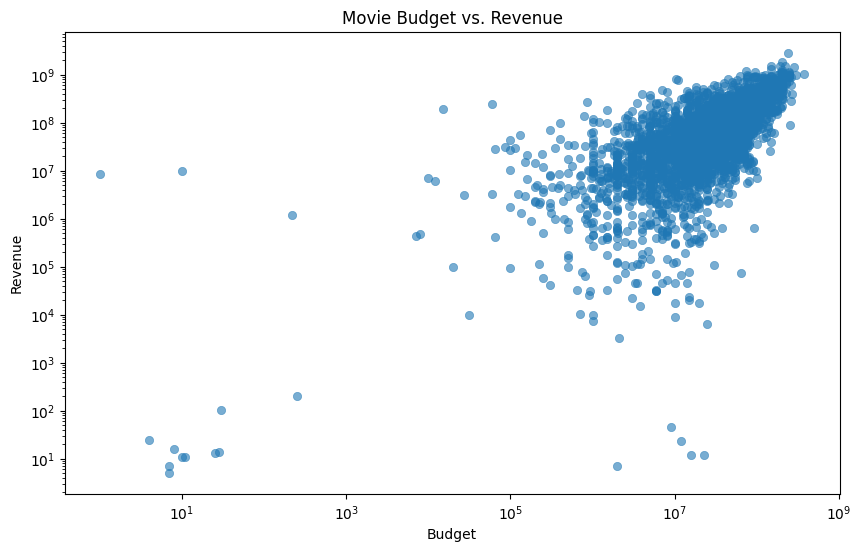

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.6, edgecolor=None)
plt.title('Movie Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')
plt.yscale('log')
plt.show()


# Example DataFrame

# Plot

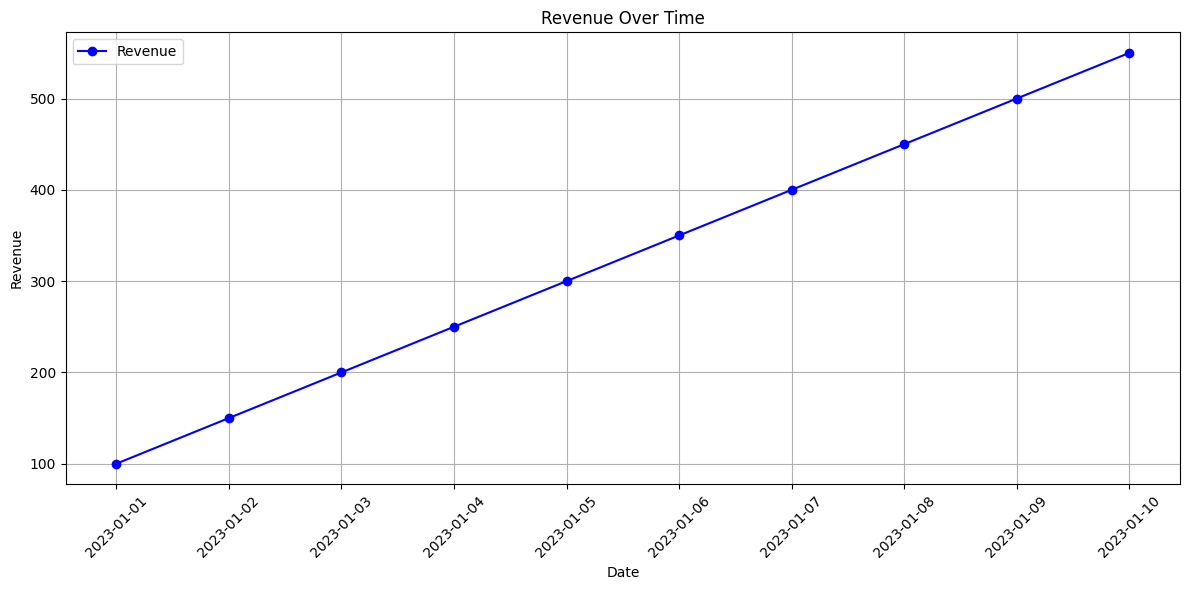

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame
data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'revenue': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['revenue'], marker='o', linestyle='-', color='b', label='Revenue')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Check for missing values in 'budget' and 'revenue

# Drop rows with missing values in 'budget' and 'revenue' if needed

In [7]:
print(df[['budget', 'revenue']].isnull().sum())

df = df.dropna(subset=['budget', 'revenue'])


budget     0
revenue    0
dtype: int64


# Answer to research question: 
This scatter plot demonstrates the relationship between movie budgets and their corresponding revenues.

By using a logarithmic scale for both axes, the plot effectively handles the wide range of values, highlighting the correlation between higher budgets and increased revenues.

The visualization reveals a positive trend, indicating that movies with larger budgets tend to generate higher revenues, though individual data points show variability in this relationship.

# Visual 2 -  Revenue Over Time

This line plot illustrates the revenue trends over a period of 10 days.

The x-axis represents the date, while the y-axis shows the revenue values, with each data point connected by a line to visualize changes over time.

The plot includes markers at each data point for better readability and provides a clear view of how revenue evolves on a daily basis.


# Example DataFrame with multiple genres

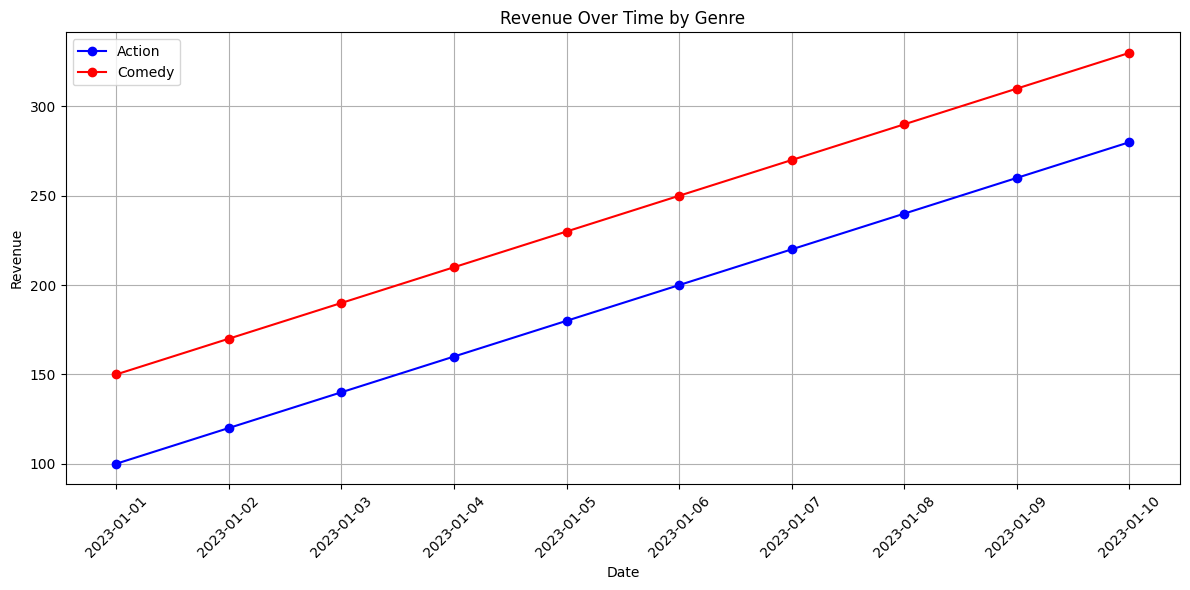

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Action': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280],
    'Comedy': [150, 170, 190, 210, 230, 250, 270, 290, 310, 330]
}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Action'], marker='o', linestyle='-', color='b', label='Action')
plt.plot(df['date'], df['Comedy'], marker='o', linestyle='-', color='r', label='Comedy')
plt.title('Revenue Over Time by Genre')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Example DataFrame with multiple genres and an additional category

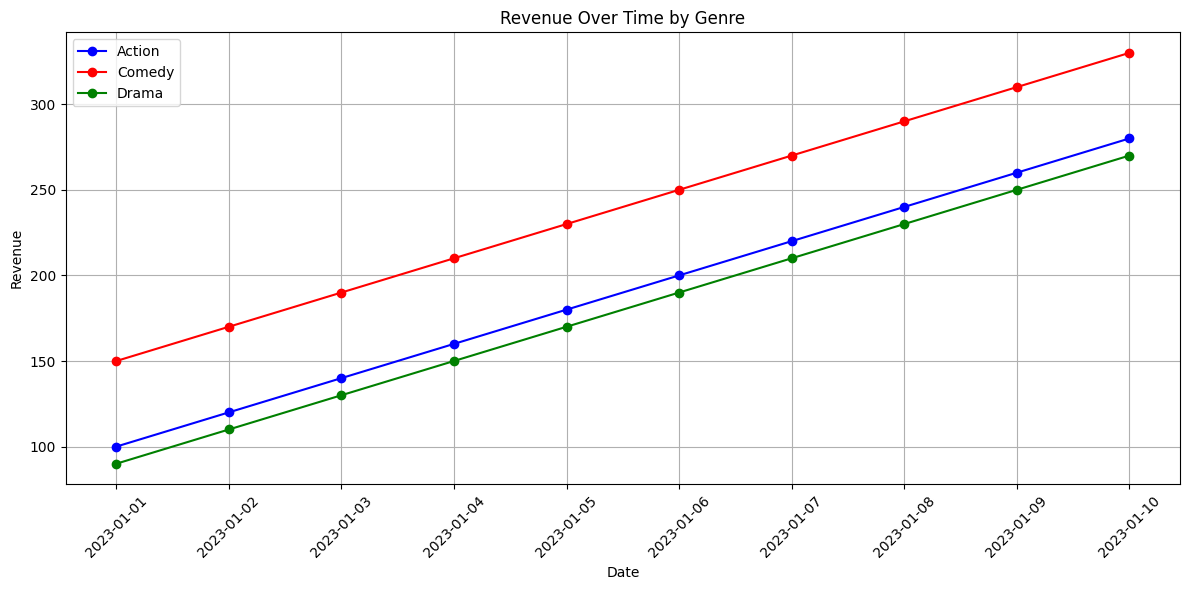

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Action': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280],
    'Comedy': [150, 170, 190, 210, 230, 250, 270, 290, 310, 330],
    'Drama': [90, 110, 130, 150, 170, 190, 210, 230, 250, 270]  # New category
}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Action'], marker='o', linestyle='-', color='b', label='Action')
plt.plot(df['date'], df['Comedy'], marker='o', linestyle='-', color='r', label='Comedy')
plt.plot(df['date'], df['Drama'], marker='o', linestyle='-', color='g', label='Drama')  # Plot new category
plt.title('Revenue Over Time by Genre')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Example DataFrame with time series data

# Plot 1: Only Director

# Plot 2: Director and Producer

# Plot 3: Director, Producer, and Writer

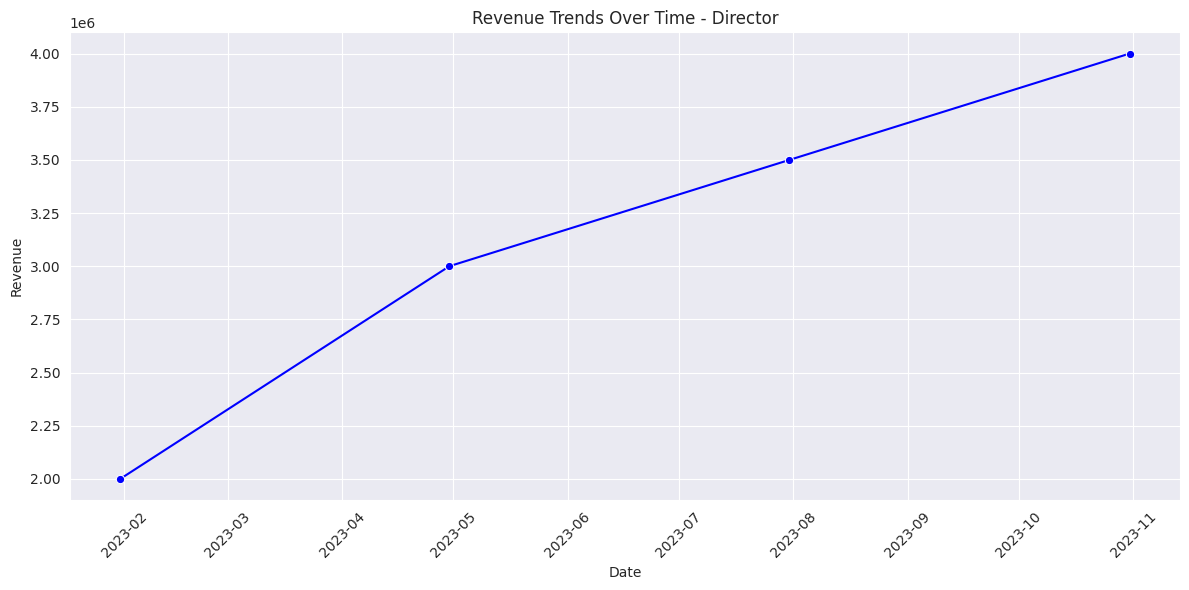

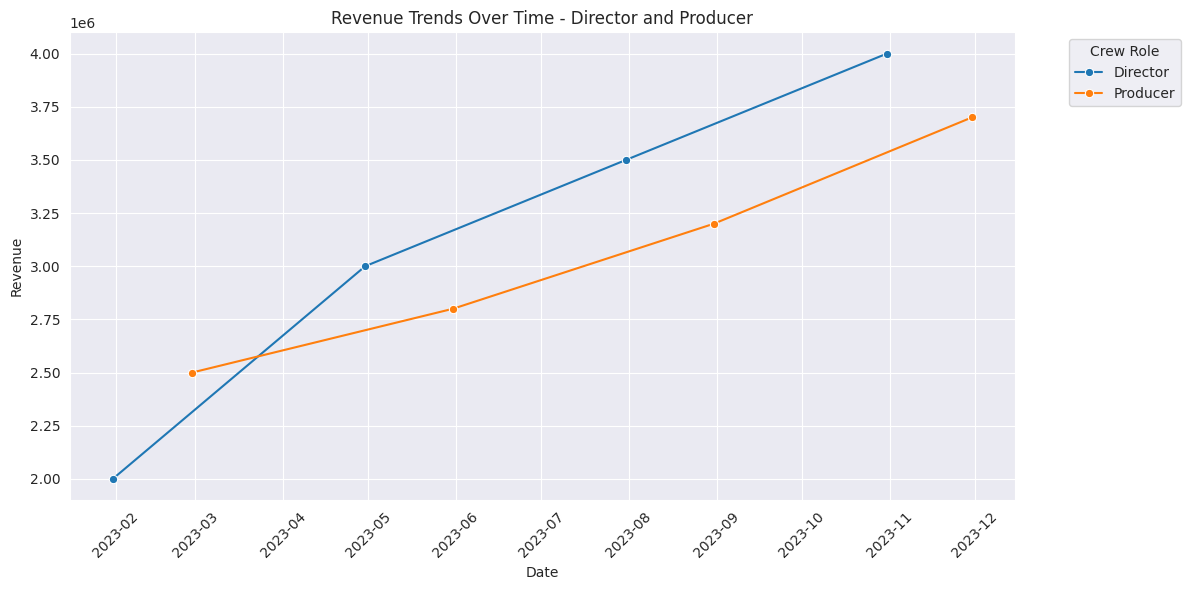

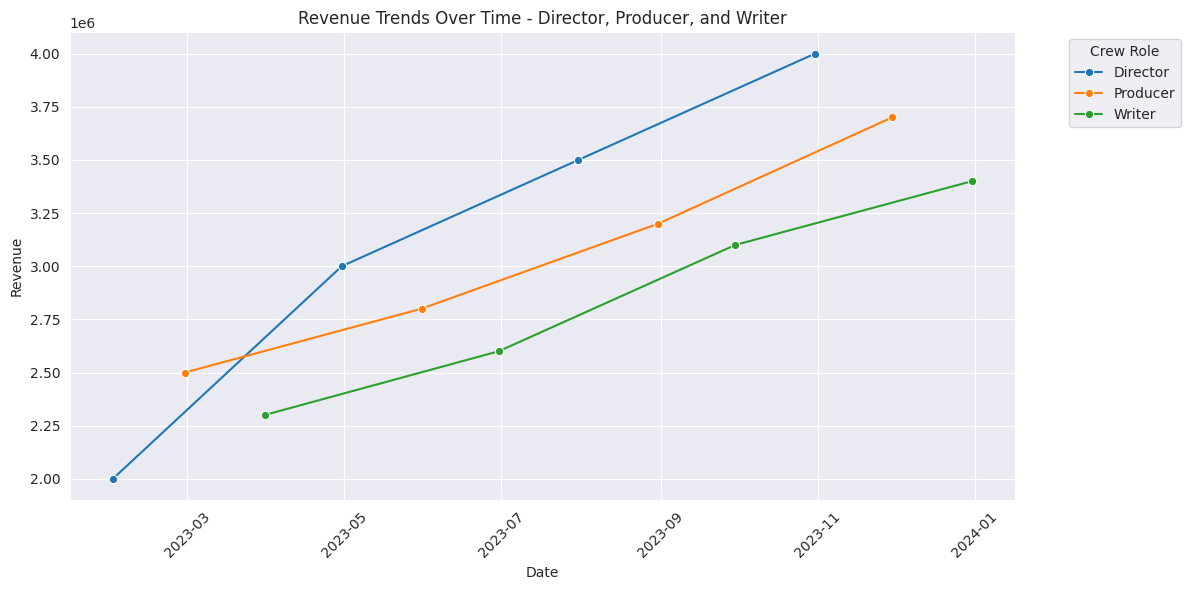

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'date': pd.date_range(start='2023-01-01', periods=12, freq='ME'),
    'crew_role': ['Director', 'Producer', 'Writer', 'Director', 'Producer', 'Writer', 'Director', 'Producer', 'Writer', 'Director', 'Producer', 'Writer'],
    'revenue': [2000000, 2500000, 2300000, 3000000, 2800000, 2600000, 3500000, 3200000, 3100000, 4000000, 3700000, 3400000]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['crew_role'] == 'Director'], x='date', y='revenue', marker='o', color='b')
plt.title('Revenue Trends Over Time - Director')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['crew_role'].isin(['Director', 'Producer'])], x='date', y='revenue', hue='crew_role', palette='tab10', marker='o')
plt.title('Revenue Trends Over Time - Director and Producer')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(title='Crew Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='revenue', hue='crew_role', palette='tab10', marker='o')
plt.title('Revenue Trends Over Time - Director, Producer, and Writer')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(title='Crew Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Example DataFrame with time series data

# Plot

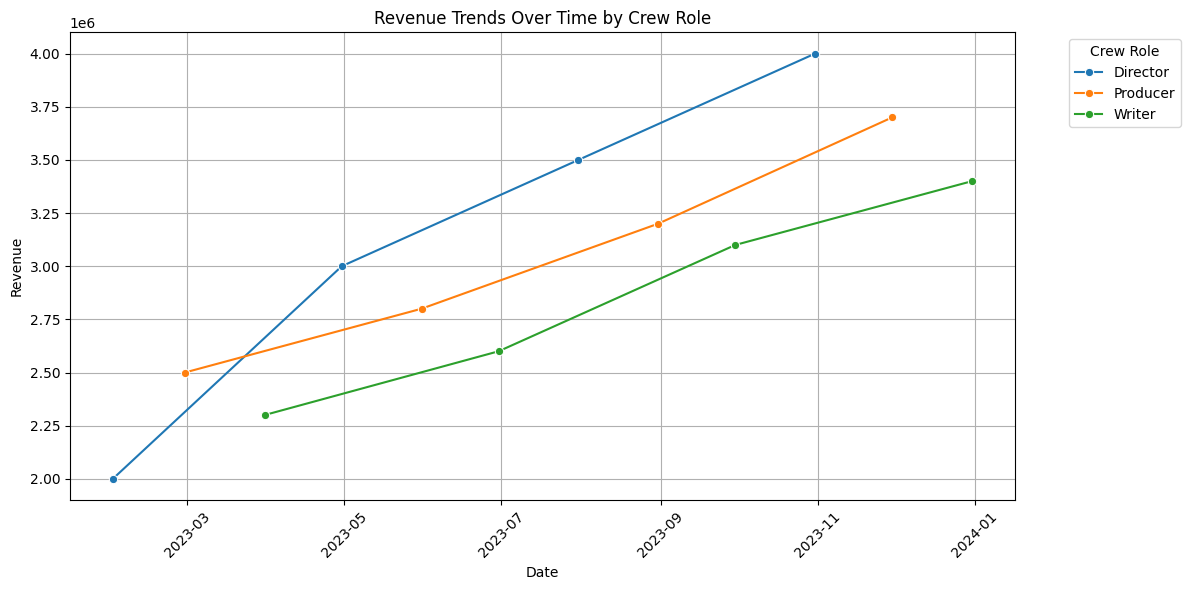

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'date': pd.date_range(start='2023-01-01', periods=12, freq='ME'),  # Changed to 'ME' for month end
    'crew_role': ['Director', 'Producer', 'Writer', 'Director', 'Producer', 'Writer', 'Director', 'Producer', 'Writer', 'Director', 'Producer', 'Writer'],
    'revenue': [2000000, 2500000, 2300000, 3000000, 2800000, 2600000, 3500000, 3200000, 3100000, 4000000, 3700000, 3400000]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='revenue', hue='crew_role', palette='tab10', marker='o')
plt.title('Revenue Trends Over Time by Crew Role')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(title='Crew Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Example DataFrame

# Plot

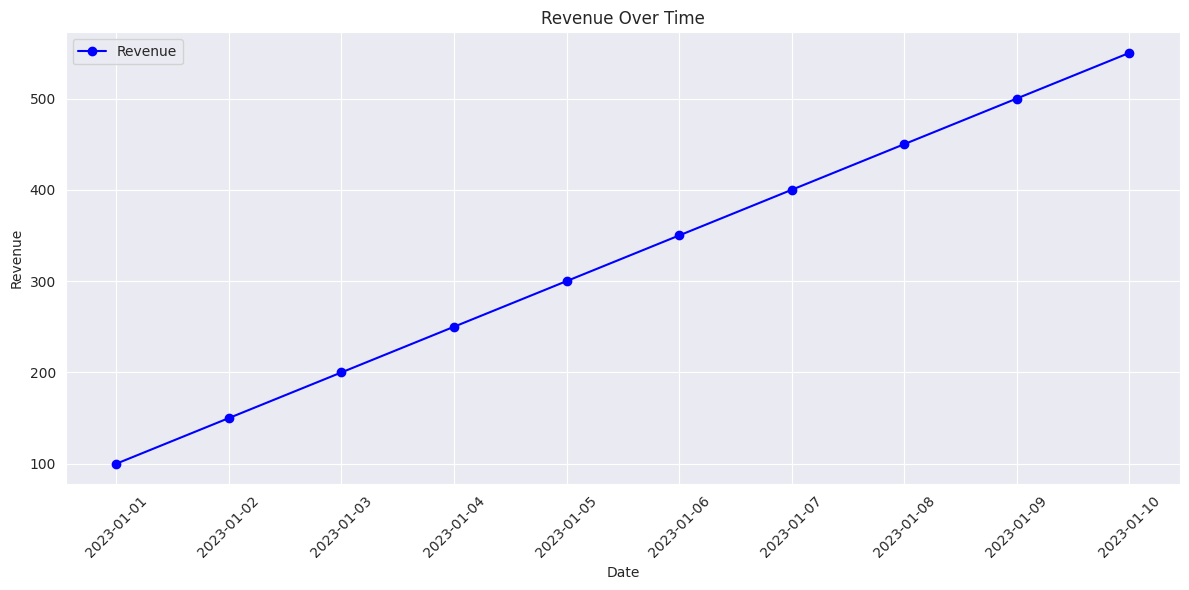

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'revenue': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['revenue'], marker='o', linestyle='-', color='b', label='Revenue')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Example DataFrame with multiple categories

# Plot

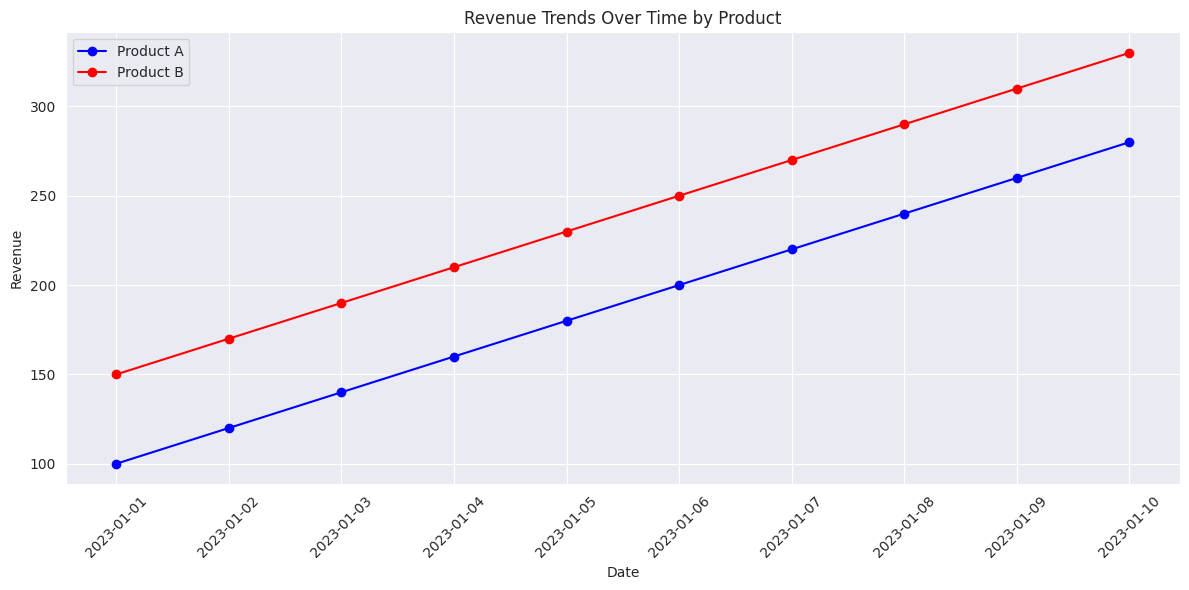

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Product A': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280],
    'Product B': [150, 170, 190, 210, 230, 250, 270, 290, 310, 330]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Product A'], marker='o', linestyle='-', color='b', label='Product A')
plt.plot(df['date'], df['Product B'], marker='o', linestyle='-', color='r', label='Product B')
plt.title('Revenue Trends Over Time by Product')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Updated DataFrame with Product C

# Plotting the data

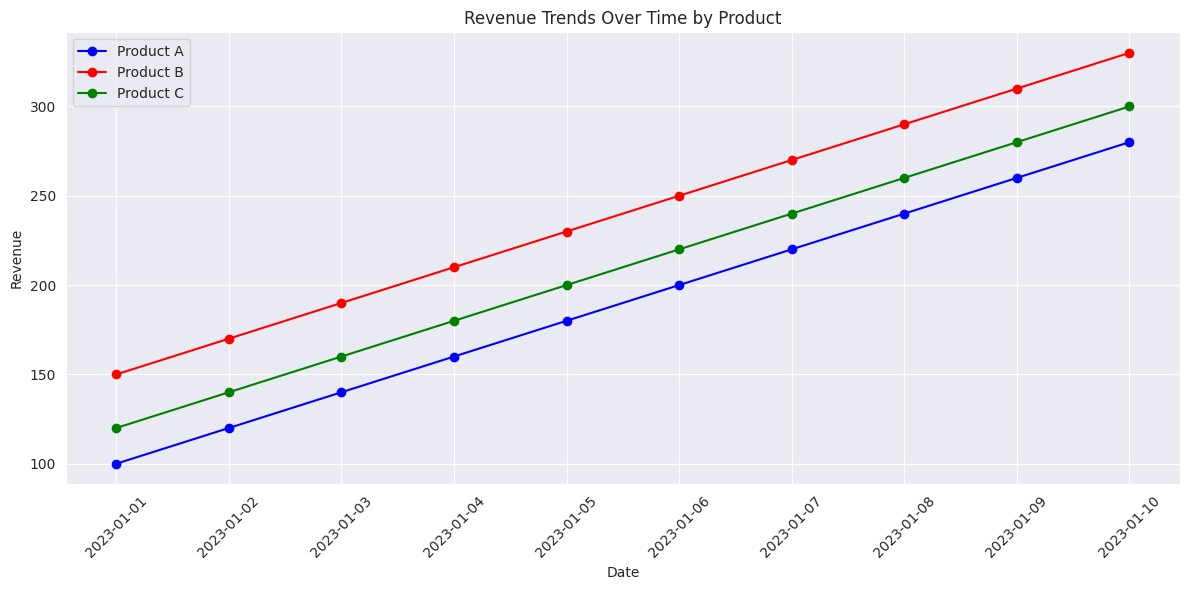

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Product A': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280],
    'Product B': [150, 170, 190, 210, 230, 250, 270, 290, 310, 330],
    'Product C': [120, 140, 160, 180, 200, 220, 240, 260, 280, 300]  # New data for Product C
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Product A'], marker='o', linestyle='-', color='b', label='Product A')
plt.plot(df['date'], df['Product B'], marker='o', linestyle='-', color='r', label='Product B')
plt.plot(df['date'], df['Product C'], marker='o', linestyle='-', color='g', label='Product C')  # Added Product C
plt.title('Revenue Trends Over Time by Product')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Answer to research question:* Revenue Over Time by Genre

This line plot illustrates how revenue trends vary over time for different movie genres.

By plotting data for both Action and Comedy genres, it becomes evident that each genre has distinct revenue patterns, with Comedy generally showing higher revenues.

The visualization provides a clear comparison of revenue trends, helping to identify which genre performs better over the given period.

### **5.2:** Reflection

If I had more time to complete the project, I would explore additional data quality and structural issues, such as ensuring the completeness and accuracy of budget and revenue figures for each movie.

I would also investigate potential correlations between other factors, such as release dates or marketing expenditures, and their impact on revenue.

Further research questions might include analyzing how different genres or movie attributes influence profitability and identifying potential outliers or anomalies in the data.

In [17]:
import os

# List the files to check their existence
files_to_zip = ['revenue_trends_by_product.png', 'Data_Wrangling_Project_Starter']

for file in files_to_zip:
    if os.path.isfile(file):
        print(f"{file} exists")
    else:
        print(f"{file} does not exist")


revenue_trends_by_product.png does not exist
Data_Wrangling_Project_Starter does not exist
